In [164]:
import pandas as pd
import seaborn as sns

In [165]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [166]:
hotels['review_date_new'] = pd.to_datetime(hotels['review_date'])
hotels['month_review'] = hotels['review_date_new'].dt.month

In [167]:
# На вход данной функции поступает строка с адресом.
def get_country(address):
# Метод split() разбивает строку на слова по пробелу.
# В результате получаем список слов в строке и заносим его в переменную address_list.
    address_list = address.split(' ')
# Обрезаем список, оставляя в нём только последний элемент - страна нахождения гостиницы
    country = address_list[-1]
    if country == 'Kingdom':
        country = address_list[-2]+' '+address_list[-1]
    return country

# На вход данной функции поступает строка с адресом.
def get_city(address):
# Метод split() разбивает строку на слова по пробелу.
# В результате получаем список слов в строке и заносим его в переменную address_list.
    address_list = address.split(' ')
# Обрезаем список, оставляя в нём только предпоследний элемент - страна нахождения гостиницы
    city = address_list[-2]
    if address_list[-1] == 'Kingdom':
        city = address_list[-5]
    else:
        city = address_list[-2]
    return city

In [168]:
hotels['country'] = hotels['hotel_address'].apply(get_country)
hotels['city'] = hotels['hotel_address'].apply(get_city)

In [169]:
hotels['country'].unique()

array(['United Kingdom', 'France', 'Netherlands', 'Italy', 'Austria',
       'Spain'], dtype=object)

In [170]:
hotels['city'].unique()

array(['London', 'Paris', 'Amsterdam', 'Milan', 'Vienna', 'Barcelona'],
      dtype=object)

Text(0.5, 1.0, 'Распределение количества рецензентов для отелей взависимости от города')

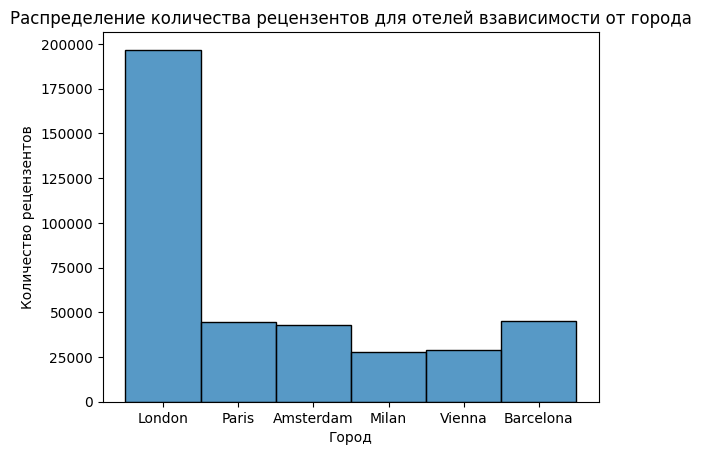

In [171]:
ax = sns.histplot(hotels['city'])
ax.set(xlabel='Город', ylabel='Количество рецензентов')
ax.set_title('Распределение количества рецензентов для отелей взависимости от города')

In [173]:
# В пропущенных значений широты и  долготы,  заполняем средним значением 
# координат отелей, находящиеся в этом же городе
for city in hotels['city'].value_counts().index:
    mask = hotels['city'] == city
    if hotels[mask].isnull().sum()['lat'] > 0 and hotels[mask].isnull().sum()['lng'] > 0:
        value = {'lat': hotels[mask]['lat'].mean(), 'lng': hotels[mask]['lng'].mean()}
        hotels[mask] = hotels[mask].fillna(value)

In [174]:
print(hotels.isnull().sum()[hotels.isnull().sum() > 0])

Series([], dtype: int64)


In [178]:
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: int(x.split()[0]))

In [149]:
# hotels['lng'] = hotels['lng'].apply(lambda x: abs(x))

In [150]:
def stayed(tag):
    # находим положение слова Stayed в отзыве
    position = tag.find('Stayed')
    # если слова в отзыве нет, то position будет равен -1. Проверяем это и в таком случае возвращаем None
    if position < 0:
        return None
    else:
        # Иначе - берем срез из 2х символов после слова Stayed, убираем пробелы и преобразуем в целое число
        return int(tag[position+7:position+9].strip())    

hotels['stayed_nights'] = hotels['tags'].apply(stayed)

values = {
    'stayed_nights': hotels['stayed_nights'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
hotels = hotels.fillna(values)

In [182]:
def hotel4leisure (tag):
    position = tag.find('Leisure trip')
    if position<0:
        return 0
    else:
        return 1

hotels['hotel4leisure'] = hotels['tags'].apply(hotel4leisure)

In [180]:
def hotel4business (tag):
    position = tag.find('Business trip')
    if position<0:
        return 0
    else:
        return 1

hotels['hotel4business'] = hotels['tags'].apply(hotel4business)

In [186]:
def guest_couple (tag):
    position = tag.find(' Couple ')
    if position<0:
        return 0
    else:
        return 1

hotels['guest_couple'] = hotels['tags'].apply(guest_couple)

In [187]:
def guest_solo (tag):
    position = tag.find(' Solo traveler ')
    if position<0:
        return 0
    else:
        return 1

hotels['guest_solo'] = hotels['tags'].apply(guest_solo)

In [188]:
def guest_group (tag):
    position = tag.find(' Group ')
    if position<0:
        return 0
    else:
        return 1

hotels['guest_group'] = hotels['tags'].apply(guest_group)

In [189]:
def guest_family (tag):
    position = tag.find(' Family with ')
    if position<0:
        return 0
    else:
        return 1

hotels['guest_family'] = hotels['tags'].apply(guest_family)

In [190]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  object        
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [191]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['city'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['city'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,guest_couple,guest_solo,guest_group,guest_family,city_London,city_Paris,city_Amsterdam,city_Milan,city_Vienna,city_Barcelona
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,1,0,0,0,1,0,0,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,1,0,0,0,1,0,0,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,0,1,0,0,0,1,0,0,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,1,0,0,0,1,0,0,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,0,0,1,0,1,0,0,0,0,0
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,0,0,0,0,0,0,0,1,0
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,1,0,0,1,0,0,0,0,0
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,0,1,0,0,1,0,0,0,0,0


In [192]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

In [193]:
hotels.drop(['review_date_new'], axis=1, inplace=True)

In [134]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [194]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int64  
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

In [140]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'stayed_nights', 'hotel4leisure']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'lng', 'hotel4leisure', 'month_review', 'stayed_nights']

<Axes: >

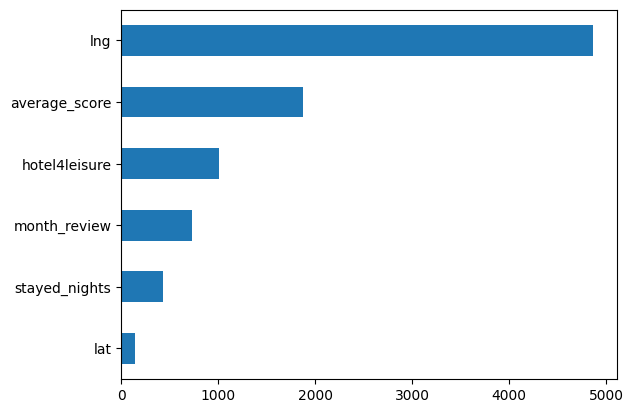

In [141]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [195]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [196]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [197]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [198]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.16279573160033653


Небольшой бонус:
